# WeatherPy
----
## Observable Trends
#### Latitude vs Temperature, humidity, Cloudiness and Wind Speed
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Import dependencies 
import os
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
import time

# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_file = "WeatherPy_data_output/Cities.csv"

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
LatitudeRange = (-90, 90)
LongitudeRange = (-180, 180)

## Generate Cities List

In [75]:
# List for holding Latitudes_Longitudes and Cities
Latitudes_Longitudes = []
Cities = []

# Create a set of random latitude and longitude combinations
Latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
Longitutes = np.random.uniform(low=-180.000, high=180.000, size=1500)
Latitudes_Longitudes = zip(Latitudes, Longitutes)

# Identify nearest city for each latitude/longitude combination
for Lat_Lng in Latitudes_Longitudes:
    City = citipy.nearest_city(Lat_Lng[0], Lat_Lng[1]).city_name
    
    # If the city is unique, add it to a the cities list
    if City not in Cities:
        Cities.append(City)

# Print the city count to confirm sufficient count
print("{} cities have been identified to poll for weather".format(len(Cities)))




593 cities have been identified to poll for weather


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [76]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key +"&q="

# Cities weather data frame
Cities_df = pd.DataFrame({"City":Cities})
Cities_df["Temperature(C)"] =""
Cities_df["Humidity(%)"] =""
Cities_df["Cloudiness(%)"] =""
Cities_df["Wind Speed (kph)"] =""
Cities_df["Latitude"]=""
Cities_df["Longitude"]=""
Cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    
    try:
        Cities_df.loc[index,"Temperature(C)"]=city_weather['main']['temp']
        Cities_df.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_df.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_df.loc[index,"Wind Speed (kph)"]=city_weather['wind']['speed']
        Cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_df)

Beginning Data Retrieval
------------------------
Processing Record 0 | tasiilaq
Processing Record 1 | rikitea
Processing Record 2 | ribeira grande
Processing Record 3 | karratha
Processing Record 4 | yulara
Processing Record 5 | ushuaia
Processing Record 6 | yurla
Processing Record 7 | codrington
Processing Record 8 | georgetown
Processing Record 9 | belushya guba
City not found... skipping.
Processing Record 10 | cape town
Processing Record 11 | pevek
Processing Record 12 | busselton
Processing Record 13 | albany
Processing Record 14 | qasigiannguit
Processing Record 15 | kulhudhuffushi
Processing Record 16 | isangel
Processing Record 17 | lompoc
Processing Record 18 | jamestown
Processing Record 19 | mahebourg
Processing Record 20 | hermanus
Processing Record 21 | luderitz
Processing Record 22 | gorontalo
Processing Record 23 | te anau
Processing Record 24 | ilulissat
Processing Record 25 | puerto ayora
Processing Record 26 | hilo
Processing Record 27 | cap estate
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
# Drop cities that return blanks
Cities_df.replace("", np.nan, inplace = True)
CitiesClean_df = Cities_df.dropna()

# Display  data frame
CitiesClean_df.head()


,City,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed (kph),Latitude,Longitude
0,tasiilaq,1.97,90.0,100.0,1.71,65.6145,-37.6368
1,rikitea,23.72,76.0,100.0,3.06,-23.1203,-134.9692
2,ribeira grande,13.22,88.0,75.0,7.20,38.5167,-28.7000
3,karratha,34.02,23.0,0.0,4.16,-20.7377,116.8463
4,yulara,24.91,27.0,100.0,6.69,-25.2406,130.9889


In [78]:
# Print the total numerb of cities
print(f"There are {len(CitiesClean_df)} cities included in this weather analyses.")

# Save data frame as csv file
CitiesClean_df.to_csv('WeatherPy_Data_Output/CityDataOutput.csv')

There are 545 cities included in this weather analyses.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
# Check if there are any cities with >100% humidity
CityCheck = CitiesClean_df["Humidity(%)"].describe(include = "all")

# Print number of Cities with >100% humidity
print("Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!")

# Display stats
CityCheck

Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!


count    545.000000
mean      70.192661
std       22.564319
min        1.000000
25%       61.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity(%), dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

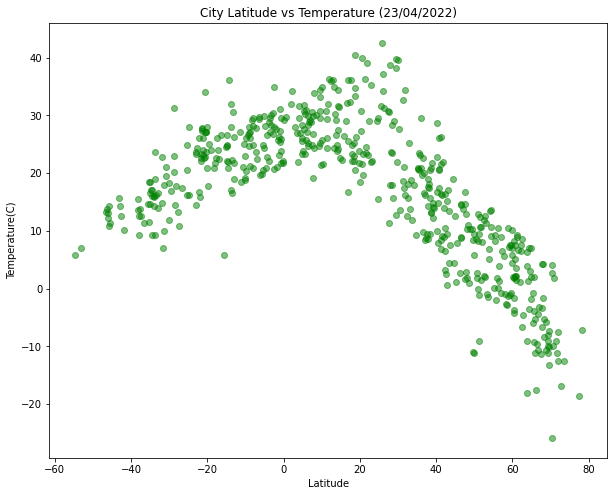

In [97]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Temperature'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Temperature(C)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
plt.title(f'City Latitude vs Temperature (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsTemperature.png")

# Display scatter plot 'City Latitude vs Termperature'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Temperature plot indicates the closer a city is to the Equator the higher the temperature. Whereas the closer the city is to either of the poles the lower the temperature in comparison to cities close to the Equator. 

## Latitude vs. Humidity Plot

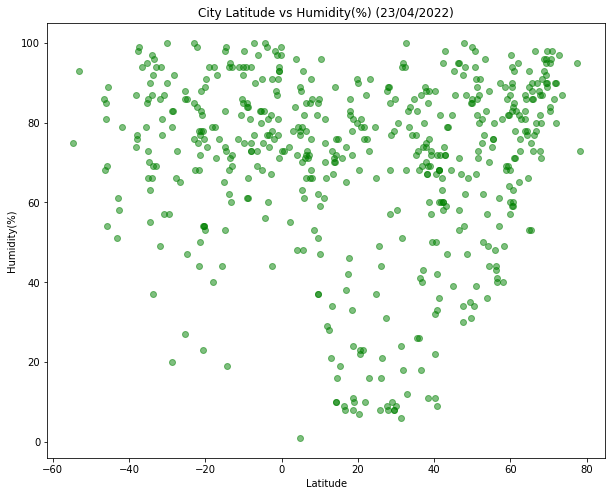

In [98]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Humidity(%)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Humidity(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity(%) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsHumidity.png")

# Display scatter plot 'City Latitude vs Humidity(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Humidity plot indicates that a larger part of cities has a humidity of above 50%.

## Latitude vs. Cloudiness Plot

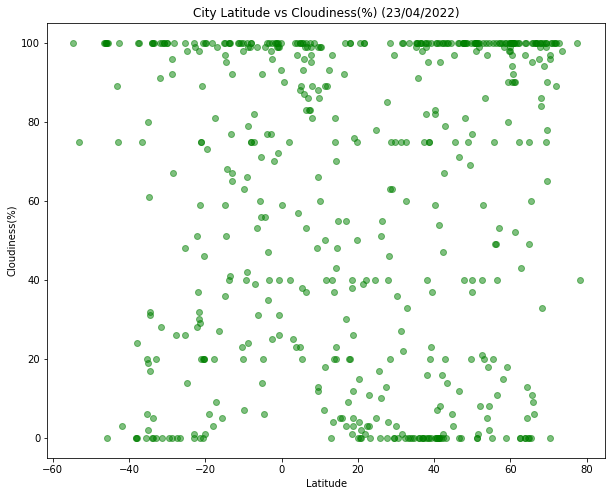

In [99]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Cloudiness(%)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Cloudiness(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness(%) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsCloudiness.png")

# Display scatter plot 'City Latitude vs Cloudiness(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

Latitude vs Cloudiness plot does not indicate any strong relationships.

## Latitude vs. Wind Speed Plot

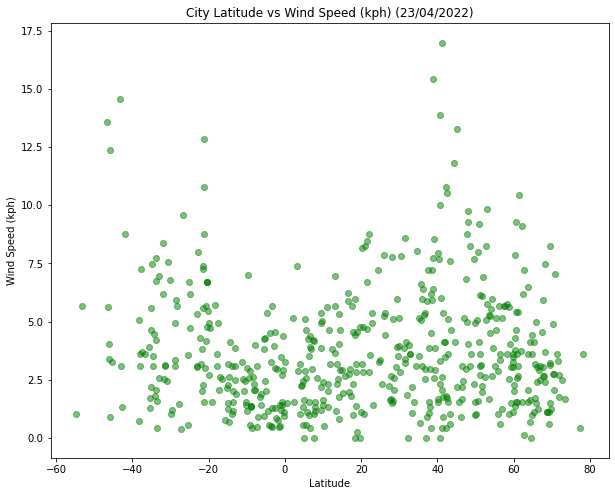

In [100]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Wind Speed (kph)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Wind Speed (kph)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title(f'City Latitude vs Wind Speed (kph) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsWindSpeed.png")

# Display scatter plot 'City Latitude vs Wind Speed (kph)'
plt.show()

## Linear Regression

In [103]:
# Create Northern and Southern Hemisphere DataFrames

# Create a subset of all the cities that are on or north of the equator for the Northern Hemisphere DataFrame
NorthernHemisphere = CitiesClean_df.loc[CitiesClean_df["Latitude"] >= 0]
NorthernCitiesCount = len(NorthernHemisphere)
print(f"There are {len(NorthernHemisphere)} cities in the northern hemisphere out of a total of {len(CitiesClean_df)}.")

# Create a subset of all the cities that are on or sorth of the equator for the Sorthern Hemisphere DataFrame
SouthernHemisphere = CitiesClean_df.loc[CitiesClean_df["Latitude"] <= 0]
SouthernCitiesCount = len(SouthernHemisphere)
print(f"There are {len(SouthernHemisphere)} cities in the southern hemisphere out of a total of {len(CitiesClean_df)}.")
    

There are 369 cities in the northern hemisphere out of a total of 545.
There are 176 cities in the southern hemisphere out of a total of 545.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression